<a href="https://colab.research.google.com/github/devvaii/NLP_sentiment_analysis/blob/main/sentiment_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devivs","key":"4520eb1ff58be0290967751c8e5e32a5"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38           5614        120  1.0              
mexwell/heart-disease-dataset                          🫀 Heart Disease Dataset                        399KB  2024-04-08 09:43:49           2975         55  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                              3KB  2024-03-02 18:50:30          32529        618  0.9411765        
mohdshahnawazaadil/sales-prediction-dataset            Sales prediction dataset                        31KB  2024-04-02 00:10:42  

In [8]:
! kaggle datasets download -d miriamodeyianypeter/sentiment-analysis-amazon-product-reviews

 68% 2.00M/2.93M [00:00<00:00, 2.95MB/s]
100% 2.93M/2.93M [00:00<00:00, 3.50MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sentiment-analysis-amazon-product-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import nltk
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/Amazon-Product-Reviews - Amazon Product Review (1).csv')

In [11]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [48]:
data.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
sentiment             int64
dtype: object

In [49]:
data.isna().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

In [50]:
data['review_body'] = data['review_body'].fillna('No text').astype(str)

In [14]:
#sample of the type of data where I will do sentiment analysis
data['review_body'].values[2]

'Excellent unit.  The versatility of this tablet, besides being competitively priced is a solution to the elderly.  Poor eyesight and physical disabilities associated with age and using the supporting add on features allows the user to stay in touch with our changing world.<br />A realistic add on keyboard that you can see and use.<br />I cannot wait to use my Fire HD7 to show computer created work sheets and class instructions to my students. (HMDI) Good by to copiers and reams of paper, Farwell to those costly printer inks!<br /><br />Oh yes I have much more to gain back.  Just takes a little effort to learn more, open a book and read.<br />Noel'

In [15]:
print(data.shape)

(30846, 16)


<Axes: title={'center': 'count of ratings'}, xlabel='star_rating'>

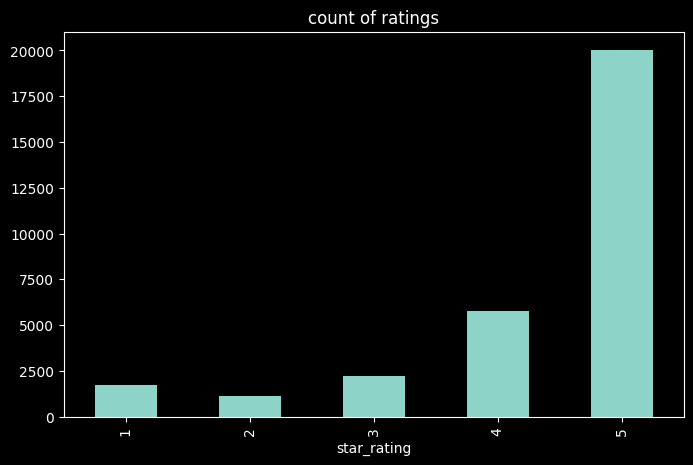

In [19]:
#rough number of star counts
data['star_rating'].value_counts().sort_index().plot(kind='bar',title='count of ratings',figsize=(8,5))

#plenty of 5 star rating for amazon

<Axes: title={'center': 'sentiment counts'}, xlabel='sentiment'>

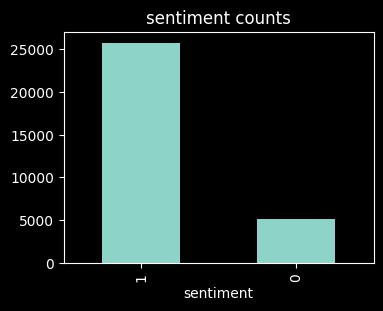

In [20]:
#number of sentiment counts
data['sentiment'].value_counts().plot(kind='bar',title='sentiment counts',figsize=(4,3))

#lots of positive sentiment here , seems good , also in alignment with the 5star ratings :)

In [35]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [29]:
#some NLTK functionalities

#tokenization
sample=data['review_body'].iloc[40]
tokens=nltk.word_tokenize(sample)

In [32]:
#part of speech tagging
nltk.pos_tag(tokens)

[('Good', 'JJ'),
 ('value', 'NN'),
 ('but', 'CC'),
 ('the', 'DT'),
 ('operating', 'NN'),
 ('system', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('buggy', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('periodically', 'RB'),
 ('crashes', 'NNS'),
 ('and', 'CC'),
 ('requires', 'VBZ'),
 ('rebooting', 'VBG'),
 ('.', '.')]

VADER SENTIMENT ANALYSIS:

Vader is a model available from NLTK library to do sentiment analysis. How it works is basically:
1. It has bag of words approach , so it takes all the words in the text
2. It assigns a score of how positive or how negative each word in the bag of words are
3. It does an aggregation of the score for each sentence to come out with the sentiment of that sentence

Whats negative here ?
It does not take in to account the relation between words which is highly imporant for human speech

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [36]:
#creating object for the ML model
sia=SentimentIntensityAnalyzer()

In [37]:
sia.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [39]:
print(sample)
sia.polarity_scores(sample)

#its already wrong here since to us its more of a negative comment , however the model says its positive since it misses the context

Good value but the operating system is a little buggy. It periodically crashes and requires rebooting.


{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.3919}

In [51]:
#sentiment analysis for whole dataframe
results={}
for i,row in tqdm(data.iterrows(),total=len(data)):
  text=row['review_body']
  myid=row['review_id']
  results[myid]=sia.polarity_scores(text)


  0%|          | 0/30846 [00:00<?, ?it/s]

In [61]:
vaders=pd.DataFrame(results).T
vaders=vaders.reset_index().rename(columns={'index':'review_id'})
vaders=vaders.merge(data,how='right')

In [62]:
vaders

,review_id,neg,neu,pos,compound,marketplace,customer_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,R1QXC7AHHJBQ3O,0.000,0.108,0.892,0.8519,US,11555559,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,R175VSRV6ZETOP,0.000,1.000,0.000,0.0000,US,31469372,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,R2HRFF78MWGY19,0.055,0.783,0.162,0.9270,US,26843895,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,R8Q39WPKYVSTX,0.076,0.787,0.137,0.9118,US,19844868,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,R3RL4C8YP2ZCJL,0.000,0.805,0.195,0.1779,US,1189852,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,R366C7ARIWLN7R,0.030,0.818,0.151,0.9998,US,44834233,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,3720,3875,N,Y,A great upgrade for me from an older Kindle Fire!,[[VIDEOID:moP3B6GS5RL8LY]]I purchased the orig...,2014-10-03,1
30842,R35PL0AOCUXLU9,0.052,0.821,0.127,0.9994,US,13376158,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,2716,2849,N,Y,Great Value for $139,I'm writing this review with the benefit of be...,2014-10-03,1
30843,R18ZJVY86AUFII,0.054,0.787,0.159,0.9927,US,40485963,B00KC6XV58,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,1525,1629,N,Y,Even grandma has it figured out!,"I purchased this Kindle for my grandma, becaus...",2014-10-03,1
30844,R36QVLQXMCZRSJ,0.043,0.765,0.192,0.9943,US,33485035,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,143,163,N,Y,The Honda Accord of Tablets,I bought my tablet Fire HD 7 at Best Buy on th...,2014-10-03,1
